# TF-IDF Index: Theory, Implementation, and Demonstration

This notebook provides a comprehensive overview of **Term Frequency-Inverse Document Frequency (TF-IDF)** indexing, how it works, and practical demonstrations using real code.

## Table of Contents
1. [What is TF-IDF?](#what-is-tf-idf)
2. [Mathematical Foundation](#mathematical-foundation)
3. [Step-by-Step Manual Calculation](#step-by-step-manual-calculation)
4. [Implementation with TFIDFCalculator](#implementation-with-tfidfc-alculator)
5. [Practical Applications](#practical-applications)
6. [Visualization and Analysis](#visualization-and-analysis)
7. [Use Cases in Information Retrieval](#use-cases-in-information-retrieval)

## What is TF-IDF?

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents. It's widely used in:

- **Information Retrieval**: Search engines use TF-IDF to rank documents
- **Text Mining**: To identify key terms in documents
- **Document Classification**: As features for machine learning models
- **RAG Systems**: For keyword-based retrieval in Retrieval-Augmented Generation

### Key Intuition:
- **High TF-IDF**: A word appears frequently in a specific document but rarely across the entire corpus
- **Low TF-IDF**: A word either appears rarely in the document, or appears commonly across many documents (like "the", "and")

TF-IDF helps identify **distinctive** and **relevant** terms for each document.

## Mathematical Foundation

TF-IDF is the product of two components:

### 1. Term Frequency (TF)
Measures how frequently a term appears in a document:

$$TF(t,d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}$$

### 2. Inverse Document Frequency (IDF)
Measures how rare or common a term is across all documents:

$$IDF(t,D) = \log\left(\frac{\text{Total number of documents}}{\text{Number of documents containing term } t}\right)$$

### 3. TF-IDF Score
The final score combines both components:

$$\text{TF-IDF}(t,d,D) = TF(t,d) \times IDF(t,D)$$

Where:
- `t` = term (word)
- `d` = document
- `D` = corpus (collection of all documents)

## Step-by-Step Manual Calculation

Let's calculate TF-IDF manually for a small corpus to understand the process:

In [1]:
import math
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.3
Pandas version: 2.3.3


In [2]:
# Define a small corpus for demonstration
documents = [
    "Machine learning is a subset of artificial intelligence",
    "Natural language processing helps computers understand text",
    "Deep learning uses neural networks with multiple layers", 
    "Machine learning algorithms can learn from data",
    "Artificial intelligence includes machine learning and deep learning"
]

print("Document Corpus:")
for i, doc in enumerate(documents, 1):
    print(f"Doc {i}: {doc}")

Document Corpus:
Doc 1: Machine learning is a subset of artificial intelligence
Doc 2: Natural language processing helps computers understand text
Doc 3: Deep learning uses neural networks with multiple layers
Doc 4: Machine learning algorithms can learn from data
Doc 5: Artificial intelligence includes machine learning and deep learning


In [3]:
# Step 1: Preprocessing - Convert to lowercase and tokenize
def preprocess(text):
    return text.lower().split()

processed_docs = [preprocess(doc) for doc in documents]

print("Preprocessed Documents (tokenized):")
for i, doc in enumerate(processed_docs, 1):
    print(f"Doc {i}: {doc}")
    
# Build vocabulary
vocabulary = set()
for doc in processed_docs:
    vocabulary.update(doc)

vocabulary = sorted(list(vocabulary))
print(f"\nVocabulary ({len(vocabulary)} unique terms):")
print(vocabulary)

Preprocessed Documents (tokenized):
Doc 1: ['machine', 'learning', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence']
Doc 2: ['natural', 'language', 'processing', 'helps', 'computers', 'understand', 'text']
Doc 3: ['deep', 'learning', 'uses', 'neural', 'networks', 'with', 'multiple', 'layers']
Doc 4: ['machine', 'learning', 'algorithms', 'can', 'learn', 'from', 'data']
Doc 5: ['artificial', 'intelligence', 'includes', 'machine', 'learning', 'and', 'deep', 'learning']

Vocabulary (29 unique terms):
['a', 'algorithms', 'and', 'artificial', 'can', 'computers', 'data', 'deep', 'from', 'helps', 'includes', 'intelligence', 'is', 'language', 'layers', 'learn', 'learning', 'machine', 'multiple', 'natural', 'networks', 'neural', 'of', 'processing', 'subset', 'text', 'understand', 'uses', 'with']


In [4]:
# Step 2: Calculate Term Frequency (TF) for each document
def calculate_tf(term, document):
    """Calculate TF for a term in a document"""
    return document.count(term) / len(document)

# Create TF matrix
tf_matrix = []
for doc in processed_docs:
    tf_scores = []
    for term in vocabulary:
        tf_scores.append(calculate_tf(term, doc))
    tf_matrix.append(tf_scores)

# Convert to DataFrame for better visualization
tf_df = pd.DataFrame(tf_matrix, 
                     columns=vocabulary, 
                     index=[f'Doc {i+1}' for i in range(len(documents))])

print("Term Frequency (TF) Matrix:")
print(tf_df.round(4))

Term Frequency (TF) Matrix:
           a  algorithms    and  artificial     can  computers    data   deep  \
Doc 1  0.125      0.0000  0.000       0.125  0.0000     0.0000  0.0000  0.000   
Doc 2  0.000      0.0000  0.000       0.000  0.0000     0.1429  0.0000  0.000   
Doc 3  0.000      0.0000  0.000       0.000  0.0000     0.0000  0.0000  0.125   
Doc 4  0.000      0.1429  0.000       0.000  0.1429     0.0000  0.1429  0.000   
Doc 5  0.000      0.0000  0.125       0.125  0.0000     0.0000  0.0000  0.125   

         from   helps  ...  natural  networks  neural     of  processing  \
Doc 1  0.0000  0.0000  ...   0.0000     0.000   0.000  0.125      0.0000   
Doc 2  0.0000  0.1429  ...   0.1429     0.000   0.000  0.000      0.1429   
Doc 3  0.0000  0.0000  ...   0.0000     0.125   0.125  0.000      0.0000   
Doc 4  0.1429  0.0000  ...   0.0000     0.000   0.000  0.000      0.0000   
Doc 5  0.0000  0.0000  ...   0.0000     0.000   0.000  0.000      0.0000   

       subset    text  under

In [5]:
# Step 3: Calculate Inverse Document Frequency (IDF)
def calculate_idf(term, documents):
    """Calculate IDF for a term across all documents"""
    total_docs = len(documents)
    docs_containing_term = sum(1 for doc in documents if term in doc)
    
    if docs_containing_term == 0:
        return 0.0
    
    return math.log(total_docs / docs_containing_term)

# Calculate IDF for each term
idf_scores = {}
for term in vocabulary:
    idf_scores[term] = calculate_idf(term, processed_docs)

# Create IDF DataFrame
idf_df = pd.DataFrame(list(idf_scores.items()), 
                      columns=['Term', 'IDF'])
idf_df = idf_df.set_index('Term')

print("Inverse Document Frequency (IDF) Scores:")
print(idf_df.round(4))

Inverse Document Frequency (IDF) Scores:
                 IDF
Term                
a             1.6094
algorithms    1.6094
and           1.6094
artificial    0.9163
can           1.6094
computers     1.6094
data          1.6094
deep          0.9163
from          1.6094
helps         1.6094
includes      1.6094
intelligence  0.9163
is            1.6094
language      1.6094
layers        1.6094
learn         1.6094
learning      0.2231
machine       0.5108
multiple      1.6094
natural       1.6094
networks      1.6094
neural        1.6094
of            1.6094
processing    1.6094
subset        1.6094
text          1.6094
understand    1.6094
uses          1.6094
with          1.6094


In [6]:
# Step 4: Calculate TF-IDF scores
tfidf_matrix = []
for i, doc in enumerate(processed_docs):
    tfidf_scores = []
    for term in vocabulary:
        tf = calculate_tf(term, doc)
        idf = idf_scores[term]
        tfidf = tf * idf
        tfidf_scores.append(tfidf)
    tfidf_matrix.append(tfidf_scores)

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix,
                        columns=vocabulary,
                        index=[f'Doc {i+1}' for i in range(len(documents))])

print("TF-IDF Matrix:")
print(tfidf_df.round(4))

TF-IDF Matrix:
            a  algorithms     and  artificial     can  computers    data  \
Doc 1  0.2012      0.0000  0.0000      0.1145  0.0000     0.0000  0.0000   
Doc 2  0.0000      0.0000  0.0000      0.0000  0.0000     0.2299  0.0000   
Doc 3  0.0000      0.0000  0.0000      0.0000  0.0000     0.0000  0.0000   
Doc 4  0.0000      0.2299  0.0000      0.0000  0.2299     0.0000  0.2299   
Doc 5  0.0000      0.0000  0.2012      0.1145  0.0000     0.0000  0.0000   

         deep    from   helps  ...  natural  networks  neural      of  \
Doc 1  0.0000  0.0000  0.0000  ...   0.0000    0.0000  0.0000  0.2012   
Doc 2  0.0000  0.0000  0.2299  ...   0.2299    0.0000  0.0000  0.0000   
Doc 3  0.1145  0.0000  0.0000  ...   0.0000    0.2012  0.2012  0.0000   
Doc 4  0.0000  0.2299  0.0000  ...   0.0000    0.0000  0.0000  0.0000   
Doc 5  0.1145  0.0000  0.0000  ...   0.0000    0.0000  0.0000  0.0000   

       processing  subset    text  understand    uses    with  
Doc 1      0.0000  0.2012

In [7]:
# Let's examine a specific example: term "machine" in Document 1
example_term = "machine"
example_doc_idx = 0
example_doc = processed_docs[example_doc_idx]

print(f"Detailed Calculation for '{example_term}' in Document {example_doc_idx + 1}:")
print(f"Document: {documents[example_doc_idx]}")
print(f"Tokenized: {example_doc}")
print()

# Calculate components
term_count = example_doc.count(example_term)
total_terms = len(example_doc)
tf_score = calculate_tf(example_term, example_doc)

docs_with_term = sum(1 for doc in processed_docs if example_term in doc)
total_docs = len(processed_docs)
idf_score = calculate_idf(example_term, processed_docs)

tfidf_score = tf_score * idf_score

print(f"TF Calculation:")
print(f"  - Term '{example_term}' appears {term_count} times")
print(f"  - Document has {total_terms} total terms")
print(f"  - TF = {term_count}/{total_terms} = {tf_score:.6f}")
print()

print(f"IDF Calculation:")
print(f"  - Total documents: {total_docs}")
print(f"  - Documents containing '{example_term}': {docs_with_term}")
print(f"  - IDF = log({total_docs}/{docs_with_term}) = {idf_score:.6f}")
print()

print(f"TF-IDF Score:")
print(f"  - TF-IDF = {tf_score:.6f} × {idf_score:.6f} = {tfidf_score:.6f}")

Detailed Calculation for 'machine' in Document 1:
Document: Machine learning is a subset of artificial intelligence
Tokenized: ['machine', 'learning', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence']

TF Calculation:
  - Term 'machine' appears 1 times
  - Document has 8 total terms
  - TF = 1/8 = 0.125000

IDF Calculation:
  - Total documents: 5
  - Documents containing 'machine': 3
  - IDF = log(5/3) = 0.510826

TF-IDF Score:
  - TF-IDF = 0.125000 × 0.510826 = 0.063853


## Implementation with TFIDFCalculator

Now let's use the existing `TFIDFCalculator` class from our workspace:

In [8]:
# Add the tf-idf directory to Python path
import sys
import os

# Add the tf-idf module path
tfidf_path = '/home/chuan/Documents/My_Study/DB/Vector-Databases/indexes/tf-idf'
if tfidf_path not in sys.path:
    sys.path.append(tfidf_path)

# Import the TFIDFCalculator
from tfidf_calculator import TFIDFCalculator

print("Successfully imported TFIDFCalculator from workspace!")

Successfully imported TFIDFCalculator from workspace!


In [9]:
# Initialize and fit the TF-IDF calculator
tfidf_calc = TFIDFCalculator()
tfidf_calc.fit(documents)

print("TFIDFCalculator fitted on corpus.")
print(f"Vocabulary size: {len(tfidf_calc.vocabulary)}")
print(f"Number of documents: {len(tfidf_calc.documents)}")

# Show some vocabulary
print(f"\nSample vocabulary: {sorted(list(tfidf_calc.vocabulary))[:10]}...")

TFIDFCalculator fitted on corpus.
Vocabulary size: 29
Number of documents: 5

Sample vocabulary: ['a', 'algorithms', 'and', 'artificial', 'can', 'computers', 'data', 'deep', 'from', 'helps']...


In [10]:
# Test with a query sentence
query = "I want to learn about machine learning algorithms"
print(f"Query: '{query}'")

# Calculate TF-IDF vector for the query
tfidf_vector = tfidf_calc.calculate_tfidf_vector(query)

print(f"\nTF-IDF scores for query terms:")
if tfidf_vector:
    for term, score in sorted(tfidf_vector.items(), key=lambda x: x[1], reverse=True):
        print(f"{term:12} | {score:.6f}")
else:
    print("No matching terms found in corpus vocabulary.")

Query: 'I want to learn about machine learning algorithms'

TF-IDF scores for query terms:
learn        | 0.201180
algorithms   | 0.201180
machine      | 0.063853
learning     | 0.027893


In [11]:
# Get top keywords from the query
top_keywords = tfidf_calc.get_top_keywords(query, top_k=5)

print(f"Top {len(top_keywords)} keywords from query (ranked by TF-IDF):")
for i, (keyword, score) in enumerate(top_keywords, 1):
    print(f"{i}. {keyword:12} | {score:.6f}")

Top 4 keywords from query (ranked by TF-IDF):
1. learn        | 0.201180
2. algorithms   | 0.201180
3. machine      | 0.063853
4. learning     | 0.027893


In [12]:
# Compare documents using cosine similarity based on TF-IDF
def calculate_document_similarity(tfidf_calc, query, documents):
    """Calculate similarity between query and documents using TF-IDF vectors"""
    query_vector = tfidf_calc.calculate_tfidf_vector(query)
    
    similarities = []
    for i, doc in enumerate(documents):
        doc_vector = tfidf_calc.calculate_tfidf_vector(doc)
        
        # Calculate cosine similarity
        common_terms = set(query_vector.keys()) & set(doc_vector.keys())
        
        if not common_terms:
            similarity = 0.0
        else:
            dot_product = sum(query_vector[term] * doc_vector[term] for term in common_terms)
            query_norm = math.sqrt(sum(score**2 for score in query_vector.values()))
            doc_norm = math.sqrt(sum(score**2 for score in doc_vector.values()))
            
            if query_norm == 0 or doc_norm == 0:
                similarity = 0.0
            else:
                similarity = dot_product / (query_norm * doc_norm)
        
        similarities.append((i, similarity, doc))
    
    return sorted(similarities, key=lambda x: x[1], reverse=True)

# Calculate document similarities
similarities = calculate_document_similarity(tfidf_calc, query, documents)

print(f"Document ranking for query: '{query}'")
print("=" * 70)
for rank, (doc_idx, similarity, doc) in enumerate(similarities, 1):
    print(f"Rank {rank}: Doc {doc_idx + 1} (Similarity: {similarity:.4f})")
    print(f"    {doc}")
    print()

Document ranking for query: 'I want to learn about machine learning algorithms'
Rank 1: Doc 4 (Similarity: 0.6435)
    Machine learning algorithms can learn from data

Rank 2: Doc 5 (Similarity: 0.0539)
    Artificial intelligence includes machine learning and deep learning

Rank 3: Doc 1 (Similarity: 0.0377)
    Machine learning is a subset of artificial intelligence

Rank 4: Doc 3 (Similarity: 0.0052)
    Deep learning uses neural networks with multiple layers

Rank 5: Doc 2 (Similarity: 0.0000)
    Natural language processing helps computers understand text



## Visualization and Analysis

Let's create visualizations to better understand TF-IDF behavior:

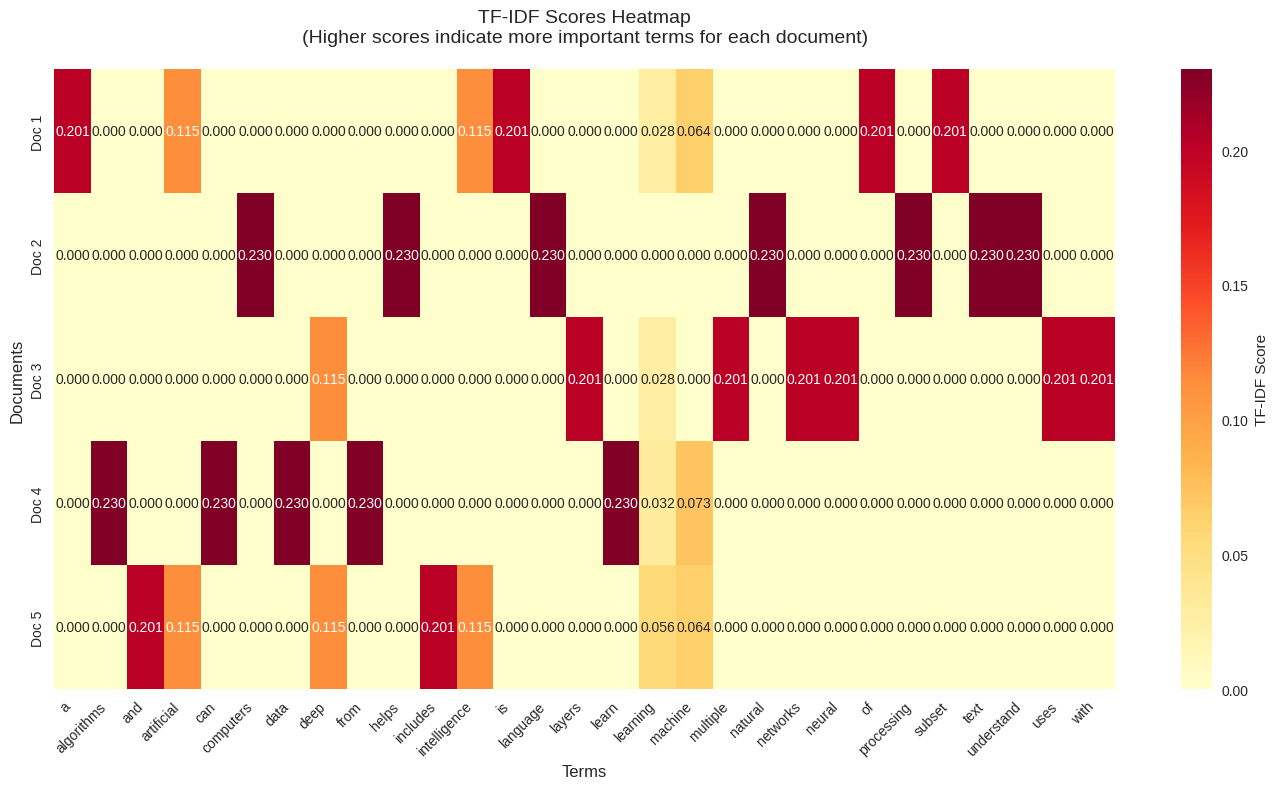

In [13]:
# Create heatmap of TF-IDF scores
plt.figure(figsize=(14, 8))

# Filter out terms with all zero scores for better visualization
non_zero_cols = tfidf_df.columns[tfidf_df.sum() > 0]
filtered_tfidf = tfidf_df[non_zero_cols]

sns.heatmap(filtered_tfidf, annot=True, cmap='YlOrRd', fmt='.3f', 
            cbar_kws={'label': 'TF-IDF Score'})
plt.title('TF-IDF Scores Heatmap\n(Higher scores indicate more important terms for each document)', 
          fontsize=14, pad=20)
plt.xlabel('Terms', fontsize=12)
plt.ylabel('Documents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

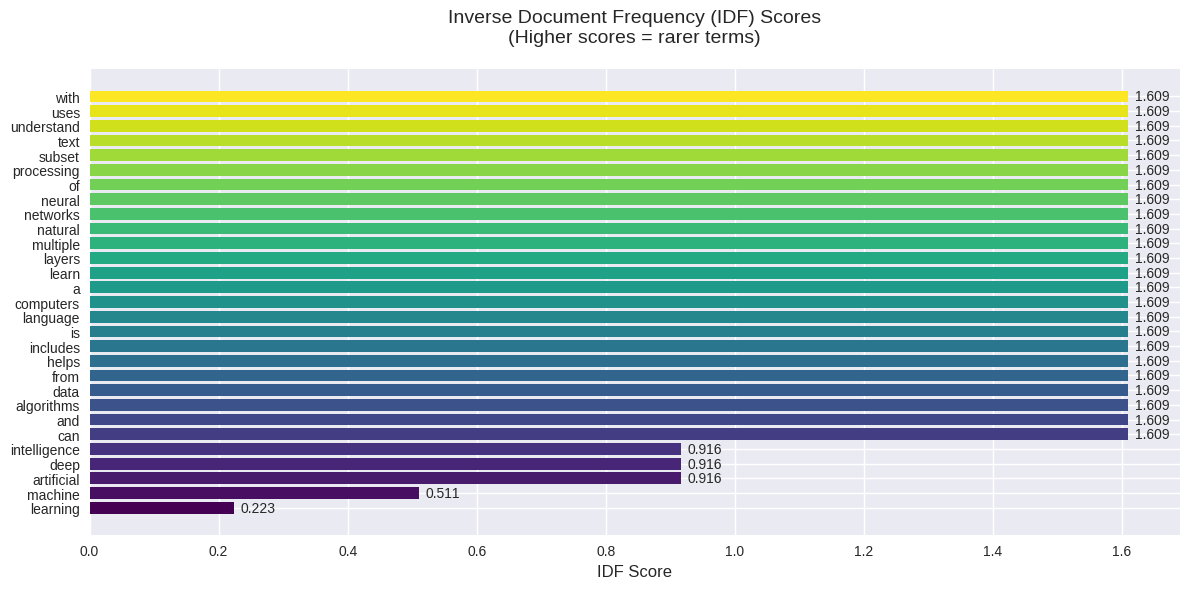

In [14]:
# Visualize IDF scores
plt.figure(figsize=(12, 6))

idf_plot_data = idf_df.sort_values('IDF', ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(idf_plot_data)))

bars = plt.barh(range(len(idf_plot_data)), idf_plot_data['IDF'], color=colors)
plt.yticks(range(len(idf_plot_data)), idf_plot_data.index)
plt.xlabel('IDF Score', fontsize=12)
plt.title('Inverse Document Frequency (IDF) Scores\n(Higher scores = rarer terms)', 
          fontsize=14, pad=20)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

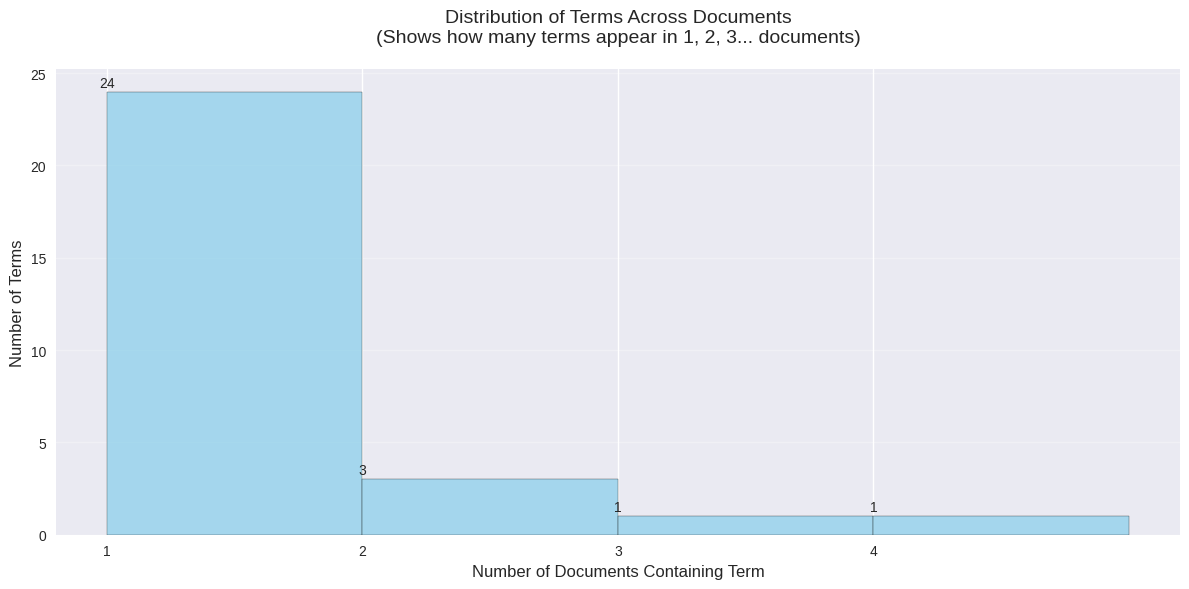

Term distribution analysis:
  24 terms appear in 1 document(s): ['a', 'algorithms', 'and', 'can', 'computers']...
  3 terms appear in 2 document(s): ['artificial', 'deep', 'intelligence']
  1 terms appear in 3 document(s): ['machine']
  1 terms appear in 4 document(s): ['learning']


In [15]:
# Analyze term distribution across documents
term_doc_counts = {}
for term in vocabulary:
    count = sum(1 for doc in processed_docs if term in doc)
    term_doc_counts[term] = count

# Create distribution plot
plt.figure(figsize=(12, 6))

doc_counts = list(term_doc_counts.values())
plt.hist(doc_counts, bins=range(1, max(doc_counts) + 2), alpha=0.7, 
         color='skyblue', edgecolor='black')
plt.xlabel('Number of Documents Containing Term', fontsize=12)
plt.ylabel('Number of Terms', fontsize=12)
plt.title('Distribution of Terms Across Documents\n(Shows how many terms appear in 1, 2, 3... documents)', 
          fontsize=14, pad=20)
plt.xticks(range(1, max(doc_counts) + 1))
plt.grid(axis='y', alpha=0.3)

# Add text annotations
for i in range(1, max(doc_counts) + 1):
    count = doc_counts.count(i)
    if count > 0:
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"Term distribution analysis:")
for i in range(1, max(doc_counts) + 1):
    count = doc_counts.count(i)
    terms = [term for term, doc_count in term_doc_counts.items() if doc_count == i]
    print(f"  {count} terms appear in {i} document(s): {terms[:5]}{'...' if len(terms) > 5 else ''}")

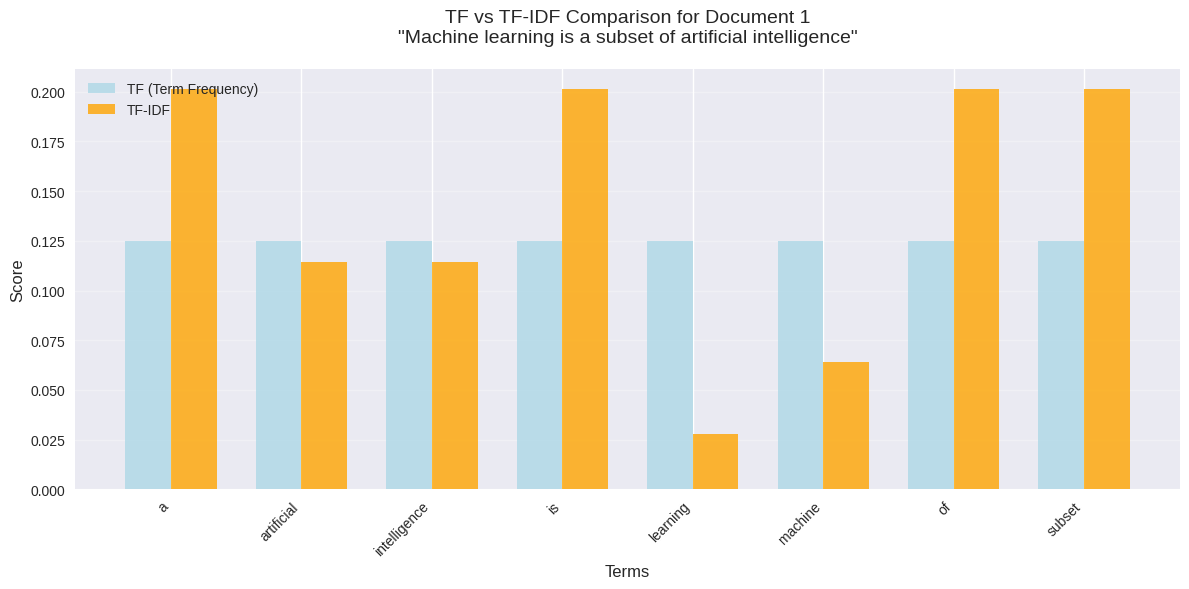

Notice how TF-IDF reduces scores for common words and emphasizes distinctive terms!


In [16]:
# Compare TF vs TF-IDF for a specific document
doc_idx = 0  # First document
doc_text = documents[doc_idx]

# Get TF and TF-IDF scores for this document
tf_scores = tf_df.iloc[doc_idx]
tfidf_scores = tfidf_df.iloc[doc_idx]

# Filter non-zero scores
non_zero_terms = tf_scores[tf_scores > 0].index

plt.figure(figsize=(12, 6))

x = np.arange(len(non_zero_terms))
width = 0.35

plt.bar(x - width/2, tf_scores[non_zero_terms], width, 
        label='TF (Term Frequency)', alpha=0.8, color='lightblue')
plt.bar(x + width/2, tfidf_scores[non_zero_terms], width, 
        label='TF-IDF', alpha=0.8, color='orange')

plt.xlabel('Terms', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title(f'TF vs TF-IDF Comparison for Document 1\n"{doc_text}"', 
          fontsize=14, pad=20)
plt.xticks(x, non_zero_terms, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Notice how TF-IDF reduces scores for common words and emphasizes distinctive terms!")

## Use Cases in Information Retrieval

Let's demonstrate how TF-IDF is used in practical information retrieval scenarios:

In [17]:
# Create a larger, more realistic corpus for RAG-style retrieval
knowledge_base = [
    "Machine learning is a method of data analysis that automates analytical model building using algorithms that iteratively learn from data",
    "Deep learning is a subset of machine learning with neural networks that have three or more layers mimicking human brain function",
    "Natural language processing enables computers to understand interpret and manipulate human language using computational linguistics",
    "Computer vision allows machines to identify and analyze visual content in images and videos using deep learning techniques",
    "Reinforcement learning is a type of machine learning where agents learn optimal actions through trial and error interactions with environment",
    "Supervised learning uses labeled training data to learn mapping function from input variables to output variables for predictions",
    "Unsupervised learning finds hidden patterns in data without labeled examples using clustering dimensionality reduction techniques",
    "Neural networks are computing systems inspired by biological neural networks consisting of interconnected nodes called neurons",
    "Artificial intelligence is the simulation of human intelligence in machines programmed to think learn and problem solve",
    "Data science combines domain expertise programming skills mathematics and statistics to extract insights from data"
]

print(f"Knowledge Base ({len(knowledge_base)} documents):")
for i, doc in enumerate(knowledge_base, 1):
    print(f"{i:2d}. {doc[:80]}...")

Knowledge Base (10 documents):
 1. Machine learning is a method of data analysis that automates analytical model bu...
 2. Deep learning is a subset of machine learning with neural networks that have thr...
 3. Natural language processing enables computers to understand interpret and manipu...
 4. Computer vision allows machines to identify and analyze visual content in images...
 5. Reinforcement learning is a type of machine learning where agents learn optimal ...
 6. Supervised learning uses labeled training data to learn mapping function from in...
 7. Unsupervised learning finds hidden patterns in data without labeled examples usi...
 8. Neural networks are computing systems inspired by biological neural networks con...
 9. Artificial intelligence is the simulation of human intelligence in machines prog...
10. Data science combines domain expertise programming skills mathematics and statis...


In [18]:
# Initialize TF-IDF for the larger corpus
rag_tfidf = TFIDFCalculator()
rag_tfidf.fit(knowledge_base)

print(f"RAG TF-IDF Calculator initialized:")
print(f"  - Vocabulary size: {len(rag_tfidf.vocabulary)}")
print(f"  - Documents: {len(rag_tfidf.documents)}")

# Test with different types of queries
test_queries = [
    "What is deep learning and neural networks?",
    "How does supervised learning work with labeled data?",
    "Explain computer vision and image analysis",
    "What are clustering techniques in unsupervised learning?"
]

print(f"\nTest queries:")
for i, query in enumerate(test_queries, 1):
    print(f"{i}. {query}")

RAG TF-IDF Calculator initialized:
  - Vocabulary size: 115
  - Documents: 10

Test queries:
1. What is deep learning and neural networks?
2. How does supervised learning work with labeled data?
3. Explain computer vision and image analysis
4. What are clustering techniques in unsupervised learning?


In [19]:
# Function to perform document retrieval
def retrieve_documents(tfidf_calc, query, documents, top_k=3):
    """Retrieve top-k most relevant documents for a query using TF-IDF"""
    similarities = calculate_document_similarity(tfidf_calc, query, documents)
    return similarities[:top_k]

# Test retrieval for each query
for i, query in enumerate(test_queries, 1):
    print(f"\n{'='*70}")
    print(f"QUERY {i}: {query}")
    print(f"{'='*70}")
    
    # Get top keywords from query
    keywords = rag_tfidf.get_top_keywords(query, top_k=3)
    print(f"Key terms: {', '.join([kw[0] for kw in keywords])}")
    
    # Retrieve relevant documents
    results = retrieve_documents(rag_tfidf, query, knowledge_base, top_k=3)
    
    print(f"\nTop 3 relevant documents:")
    for rank, (doc_idx, similarity, doc) in enumerate(results, 1):
        print(f"\n{rank}. [Doc {doc_idx + 1}] Similarity: {similarity:.4f}")
        print(f"   {doc}")


QUERY 1: What is deep learning and neural networks?
Key terms: deep, neural, is

Top 3 relevant documents:

1. [Doc 2] Similarity: 0.3129
   Deep learning is a subset of machine learning with neural networks that have three or more layers mimicking human brain function

2. [Doc 8] Similarity: 0.2234
   Neural networks are computing systems inspired by biological neural networks consisting of interconnected nodes called neurons

3. [Doc 4] Similarity: 0.1886
   Computer vision allows machines to identify and analyze visual content in images and videos using deep learning techniques

QUERY 2: How does supervised learning work with labeled data?
Key terms: supervised, with, labeled

Top 3 relevant documents:

1. [Doc 6] Similarity: 0.2889
   Supervised learning uses labeled training data to learn mapping function from input variables to output variables for predictions

2. [Doc 2] Similarity: 0.1181
   Deep learning is a subset of machine learning with neural networks that have three or 

## Summary: TF-IDF Strengths and Limitations

### Strengths:
1. **Simple and Interpretable**: Easy to understand and implement
2. **Fast Computation**: Efficient for large document collections
3. **Keyword-focused**: Good for exact keyword matching
4. **Reduces Common Word Impact**: Automatically handles stop words through IDF
5. **Established Method**: Well-tested in information retrieval systems

### Limitations:
1. **No Semantic Understanding**: Cannot capture meaning or context
2. **Sparse Representations**: Most values are zero in large vocabularies
3. **Order Independence**: Ignores word order and phrase structure
4. **Synonym Problem**: Cannot match semantically similar terms
5. **Fixed Vocabulary**: Cannot handle out-of-vocabulary terms

### Modern Alternatives:
- **Dense Embeddings**: Word2Vec, GloVe, FastText
- **Transformer Models**: BERT, RoBERTa, sentence-transformers
- **Hybrid Approaches**: Combining TF-IDF with neural embeddings

### Best Use Cases:
- **Keyword Search**: When exact term matching is important
- **Document Classification**: As features for ML models
- **Baseline Systems**: Starting point for information retrieval
- **Hybrid RAG**: Combined with semantic search for comprehensive retrieval

In [20]:
# Final demonstration: Compare keyword vs semantic queries
print("TF-IDF Behavior Analysis:")
print("=" * 50)

# Test cases showing TF-IDF strengths and weaknesses
test_cases = [
    ("machine learning algorithms", "Exact keyword match - should work well"),
    ("ML algorithms", "Abbreviation - might not match well"),
    ("artificial intelligence systems", "Related concepts - partial match expected"),
    ("computer programs that learn", "Semantic similarity - may not match well")
]

for query, description in test_cases:
    print(f"\nQuery: '{query}'")
    print(f"Expected: {description}")
    
    # Get TF-IDF scores
    tfidf_vector = rag_tfidf.calculate_tfidf_vector(query)
    
    if tfidf_vector:
        top_terms = sorted(tfidf_vector.items(), key=lambda x: x[1], reverse=True)[:3]
        print(f"Top matching terms: {', '.join([f'{term}({score:.3f})' for term, score in top_terms])}")
    else:
        print("No matching terms found in vocabulary!")
    
    # Get best matching document
    results = retrieve_documents(rag_tfidf, query, knowledge_base, top_k=1)
    if results:
        doc_idx, similarity, doc = results[0]
        print(f"Best match (similarity: {similarity:.3f}): {doc[:60]}...")
    else:
        print("No matching documents found!")

print(f"\n{'='*70}")
print("This demonstrates both the power and limitations of TF-IDF indexing!")
print("For semantic understanding, consider using dense embeddings or transformer models.")

TF-IDF Behavior Analysis:

Query: 'machine learning algorithms'
Expected: Exact keyword match - should work well
Top matching terms: algorithms(0.768), machine(0.401), learning(0.170)
Best match (similarity: 0.332): Machine learning is a method of data analysis that automates...

Query: 'ML algorithms'
Expected: Abbreviation - might not match well
Top matching terms: algorithms(1.151)
Best match (similarity: 0.288): Machine learning is a method of data analysis that automates...

Query: 'artificial intelligence systems'
Expected: Related concepts - partial match expected
Top matching terms: artificial(0.768), intelligence(0.768), systems(0.768)
Best match (similarity: 0.487): Artificial intelligence is the simulation of human intellige...

Query: 'computer programs that learn'
Expected: Semantic similarity - may not match well
Top matching terms: computer(0.576), that(0.402), learn(0.229)
Best match (similarity: 0.255): Machine learning is a method of data analysis that automates...

T